# Chapter 2: Tabular Value-Based Reinforcement Learning

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from Taxi import Taxi
from Cartpole import CartPole


## 1. *Q-learning Implement*
Q-learning for Taxi, including the procedure to derive the best policy for the Q-table.
- Go to Sect. 2.2.4.5 and implement it. 
- Print the Q-table, to see the values on the squares. You could print a live policy as the search progresses. 
- Try different values for $\varepsilon$, the exploration rate. Does it learn faster? Does it keep finding the optimal solution? 
- Try different values for $\alpha$, the learning rate. Is it faster?


In [6]:
Q = Taxi(method = "Q-learning")
Q.train(1000)
Q.play(100)

Episode 0 Total Reward:-551.0
Episode 100 Total Reward:-77.0
Episode 200 Total Reward:-141.0
Episode 300 Total Reward:-121.0
Episode 400 Total Reward:-31.0
Episode 500 Total Reward:-23.0
Episode 600 Total Reward:4.0
Episode 700 Total Reward:-42.0
Episode 800 Total Reward:-2.0
Episode 900 Total Reward:10.0
Results after 100 episodes:
Average reward per episode 9.92
Average timesteps per episode 101.83
Average penalites per episode 0.0


Episode 0 Total Reward:-587.0


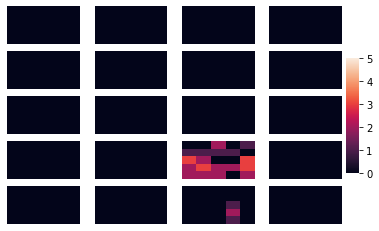

Episode 100 Total Reward:-335.0


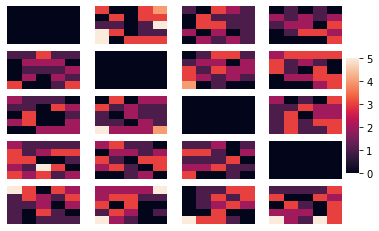

Episode 200 Total Reward:-121.0


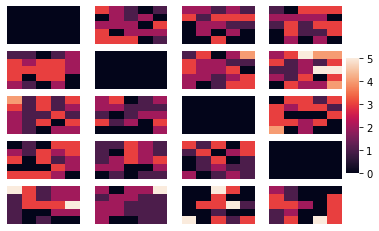

Episode 300 Total Reward:-272.0


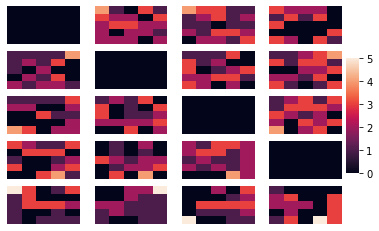

Episode 400 Total Reward:3.0


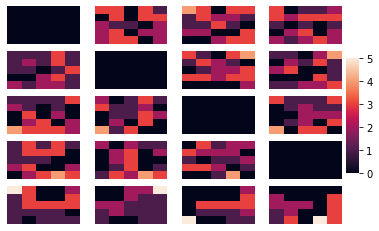

Episode 500 Total Reward:-57.0


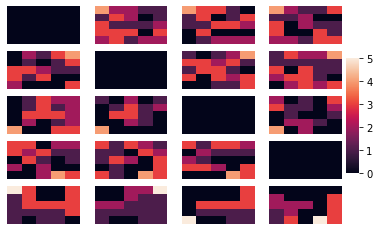

Episode 600 Total Reward:4.0


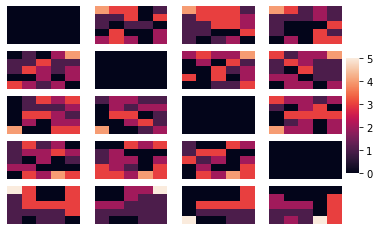

Episode 700 Total Reward:12.0


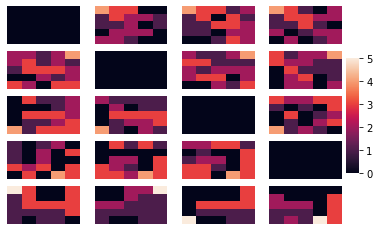

Episode 800 Total Reward:-16.0


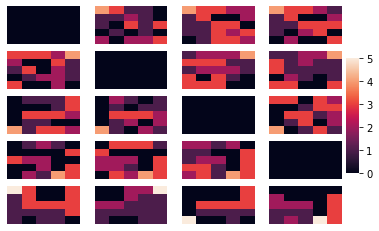

Episode 900 Total Reward:7.0


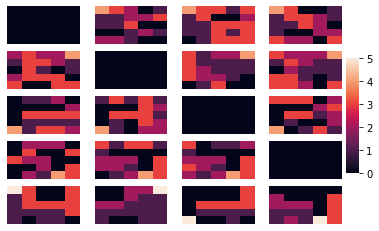

In [7]:
# show Q table change
Q = Taxi(method = "Q-learning", plot_Q = True)
Q.train(1000)

**Actions** There are 6 discrete deterministic actions:
- 0: move south
- 1: move north
- 2: move east
- 3: move west
- 4: pickup passenger
- 5: drop off passenger

**Observations**

There are 500 discrete states since there are 25 taxi positions, 5 possible
locations of the passenger (including the case when the passenger is in the
taxi), and 4 destination locations.
Note that there are 400 states that can actually be reached during an
episode. The missing states correspond to situations in which the passenger
is at the same location as their destination, as this typically signals the
end of an episode. Four additional states can be observed right after a
successful episodes, when both the passenger and the taxi are at the destination.
This gives a total of 404 reachable discrete states.

**Passenger locations**:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)
- 4: in taxi

**Destinations**:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


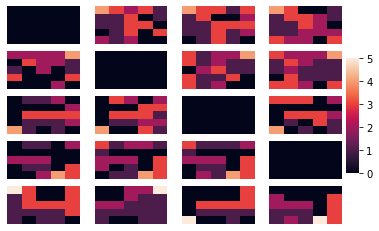

In [8]:
Q.env.render()
# each tile show where passanger is (row) and where destination is (col)
# color in each cell show optimal action if the taxi there 
Q.plot_policy()
plt.show()

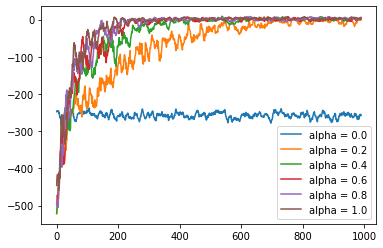

In [9]:
# play with various alpha
N = 1000
w_size = N // 100
for i in np.arange(0., 1.2, 0.2):
    Q = Taxi(alpha= i, method = "Q-learning", quiet = True)
    Q.train(N)
    ma_line = np.convolve(Q.learning_log, np.ones(w_size)/w_size, "valid")
    plt.plot(ma_line, label= f"alpha = {i:1.1f}")
plt.legend()
plt.show()

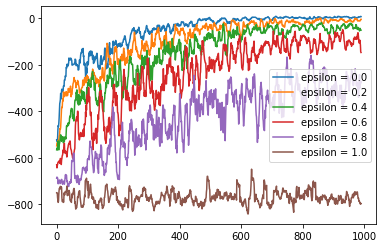

In [10]:
# play with various epsilon
N = 1000
w_size = N // 100
for i in np.arange(0., 1.2, 0.2):
    Q = Taxi(epsilon = i, method = "Q-learning", quiet = True)
    Q.train(N)
    ma_line = np.convolve(Q.learning_log, np.ones(w_size)/w_size, "valid")
    plt.plot(ma_line, label= f"epsilon = {i:1.1f}")
plt.legend()
plt.show()


## 2. *SARSA Implement* 
SARSA, the code is in Listing 2.7. Compare your results to Q-learning, can you see how SARSA chooses different paths? Try different $\varepsilon$ and $\alpha$.


In [11]:
SARSA = Taxi(method = "SARSA")
SARSA.train(1000)
SARSA.play(100)

Episode 0 Total Reward:-596.0
Episode 100 Total Reward:-59.0
Episode 200 Total Reward:-227.0
Episode 300 Total Reward:-172.0
Episode 400 Total Reward:-69.0
Episode 500 Total Reward:-91.0
Episode 600 Total Reward:5.0
Episode 700 Total Reward:0.0
Episode 800 Total Reward:-25.0
Episode 900 Total Reward:-72.0
Results after 100 episodes:
Average reward per episode 5.72
Average timesteps per episode 139.76
Average penalites per episode 0.0


Episode 0 Total Reward:-560.0


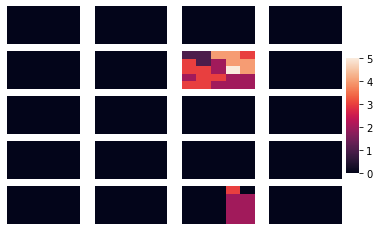

Episode 100 Total Reward:-281.0


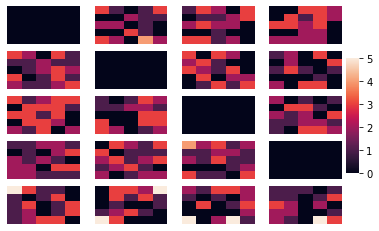

Episode 200 Total Reward:-45.0


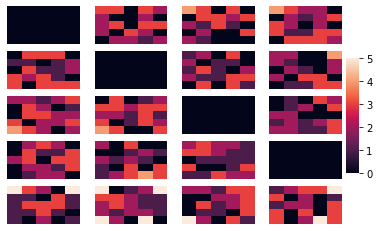

Episode 300 Total Reward:-272.0


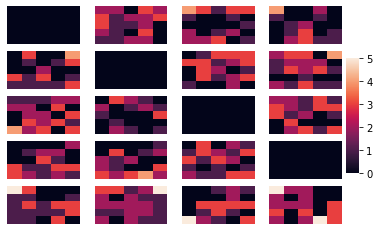

Episode 400 Total Reward:-37.0


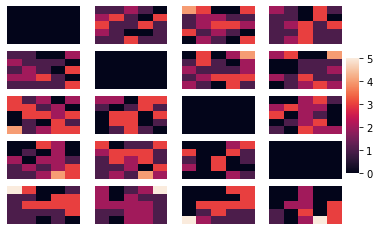

Episode 500 Total Reward:-245.0


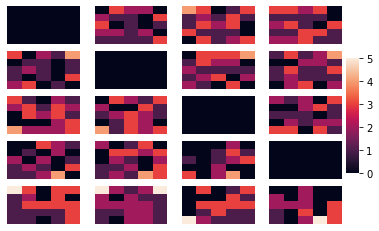

Episode 600 Total Reward:-158.0


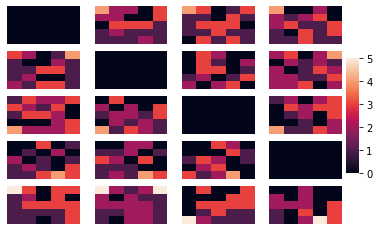

Episode 700 Total Reward:-52.0


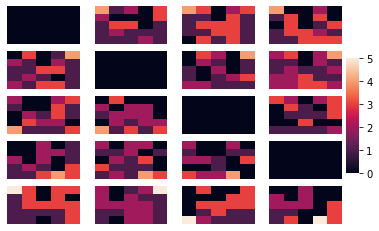

Episode 800 Total Reward:14.0


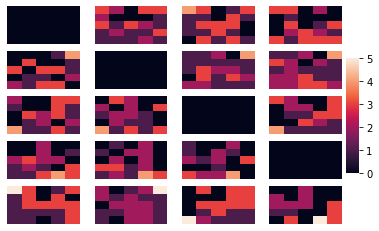

Episode 900 Total Reward:-20.0


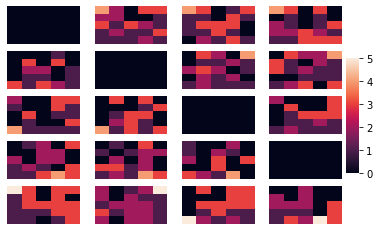

In [12]:
# show Q table change
SARSA = Taxi(method = "SARSA", plot_Q = True)
SARSA.train(1000)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


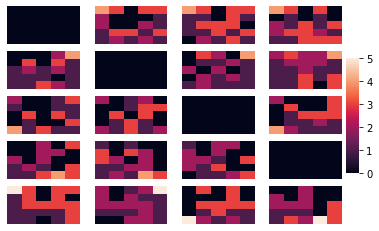

In [13]:
SARSA.env.render()
SARSA.plot_policy()
plt.show()

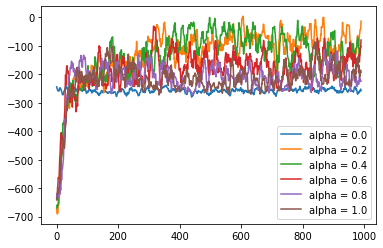

In [14]:
# play with various alpha
N = 1000
w_size = N // 100
for i in np.arange(0., 1.2, 0.2):
    SARSA = Taxi(alpha= i, method = "SARSA", quiet = True)
    SARSA.train(N)
    ma_line = np.convolve(SARSA.learning_log, np.ones(w_size)/w_size, "valid")
    plt.plot(ma_line, label= f"alpha = {i:1.1f}")
plt.legend()
plt.show()

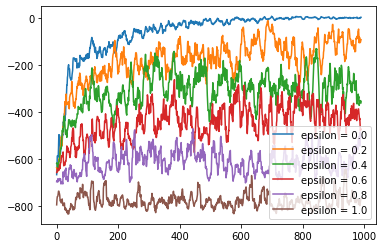

In [15]:
# play with various epsilon
N = 1000
w_size = N // 100
for i in np.arange(0., 1.2, 0.2):
    SARSA = Taxi(epsilon = i, method = "SARSA", quiet = True)
    SARSA.train(N)
    ma_line = np.convolve(SARSA.learning_log, np.ones(w_size)/w_size, "valid")
    plt.plot(ma_line, label= f"epsilon = {i:1.1f}")
plt.legend()
plt.show()

## 3. *Problem size*
How large can problems be before converging starts taking too long?

## 4. *Cartpole Run* 
Cartpole with the greedy policy computed by value iteration. Can you make it work? Is value iteration a suitable algorithm for Cartpole? If not, why do you think it is not?

In [16]:
CP = CartPole()
CP.train()
CP.play()

Episode 0 Total Reward:22.0
Episode 100 Total Reward:39.0
Episode 200 Total Reward:44.0
Episode 300 Total Reward:9.0
Episode 400 Total Reward:53.0
Episode 500 Total Reward:41.0
Episode 600 Total Reward:12.0
Episode 700 Total Reward:62.0
Episode 800 Total Reward:9.0
Episode 900 Total Reward:32.0
Results after 100 episodes:
Average reward per episode 28.28


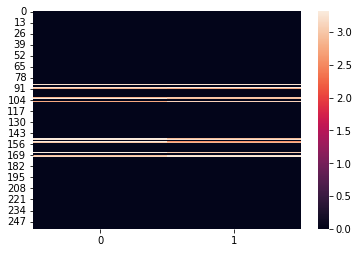

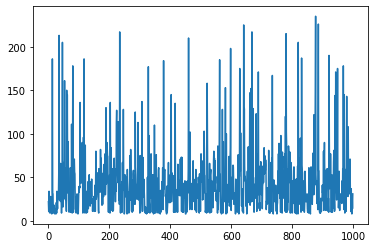

In [17]:
sns.heatmap(CP.Q)
plt.show()
plt.plot(np.array(CP.learning_log))
plt.show()

# Development

In [22]:
# you can run only once per session!!
CP.show()

error: display Surface quit